In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,log_loss,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
sns.set()
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\91998\\Desktop\\heart.csv")

In [3]:
df.shape

(303, 14)

In [4]:
df.size

4242

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Attribute Information
# Age: age of the patient [years]
# Sex: sex of the patient [M: Male, F: Female]
# ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
# RestingBP: resting blood pressure [mm Hg]
# Cholesterol: serum cholesterol [mm/dl]
# FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
# RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
# MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
# ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
# Oldpeak: oldpeak = ST [Numeric value measured in depression]
# ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
# HeartDisease: output class [1: heart disease, 0: Normal]

In [6]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [7]:
#EDA(Exploring Data and Understanding features doing univariate analysis,Bivariate analysis,Finding Distribution) and Data Cleaning(Finding Types of Features,Duplicate values,Missing Values,Outlier Detection)
#Feature Engineering((Imputting Missing Values,Outlier)) and Feature Selection and Feature Scaling
#Model Selection By Cross_Validation
#Model Building 
#Model HyperParameterTuning
#Model Evaluation(Testing)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
df1=df.copy()

In [12]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [13]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [14]:
df.duplicated().sum()

1

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

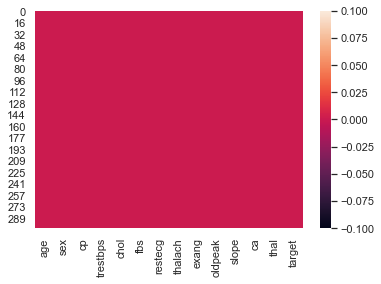

In [17]:
sns.heatmap(df.isnull());

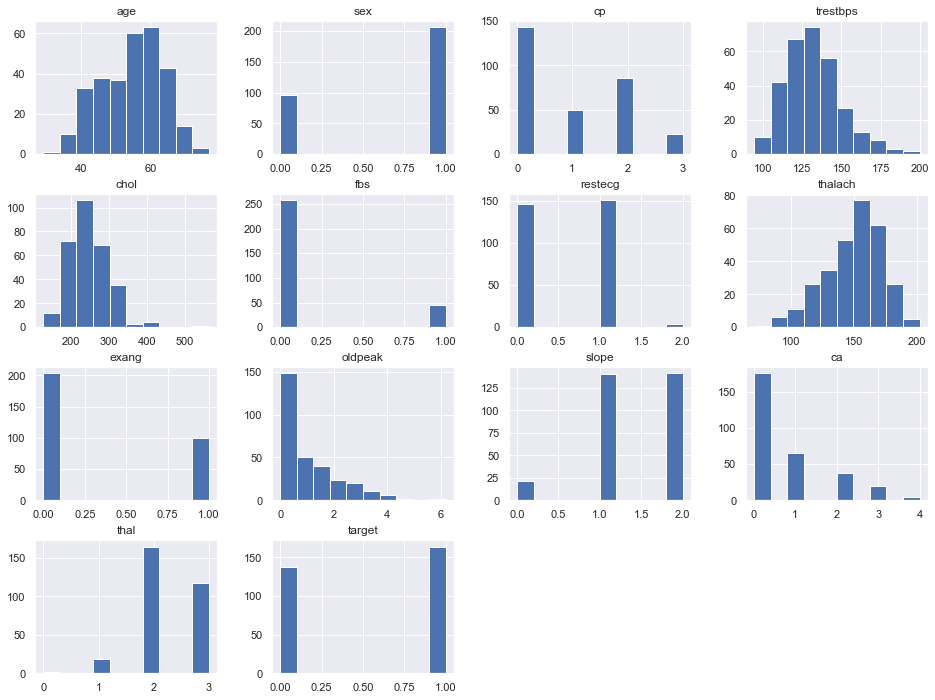

In [18]:
df.hist(figsize=(16,12));

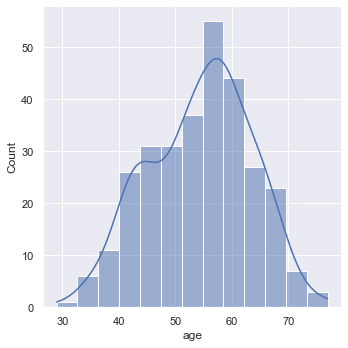

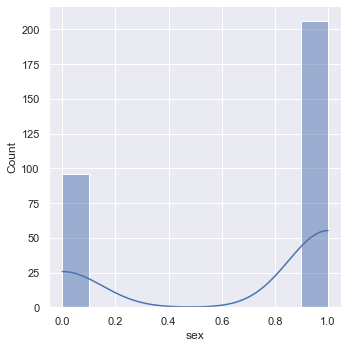

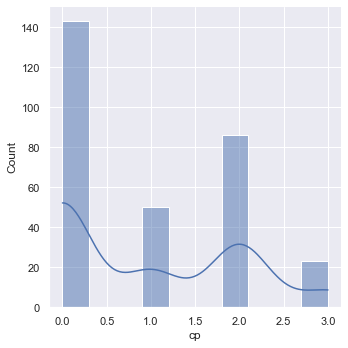

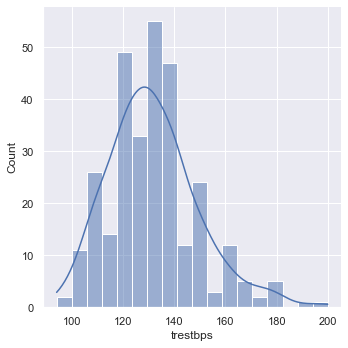

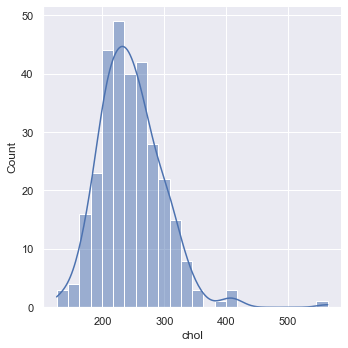

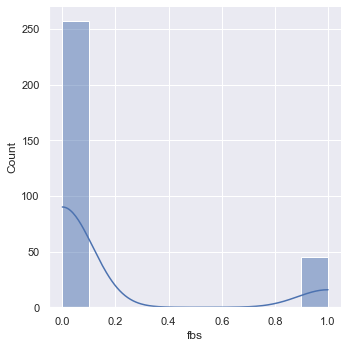

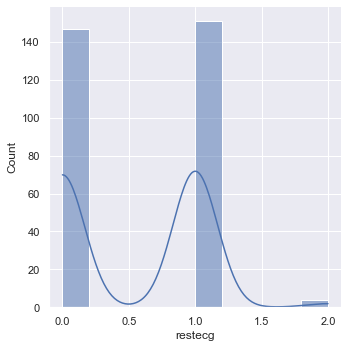

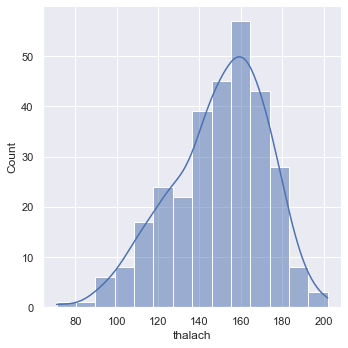

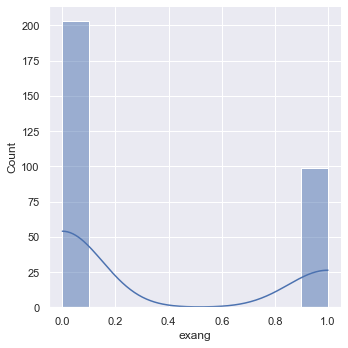

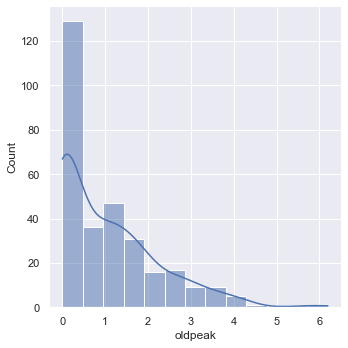

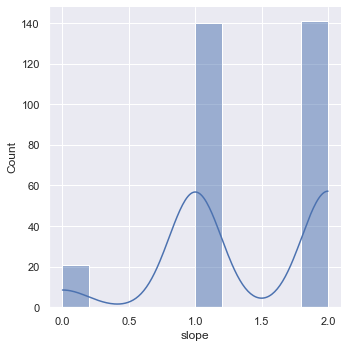

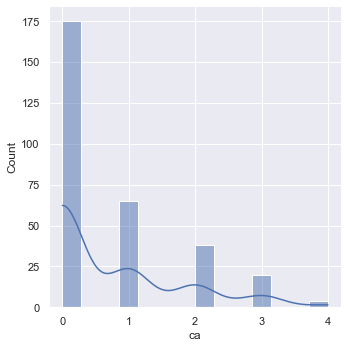

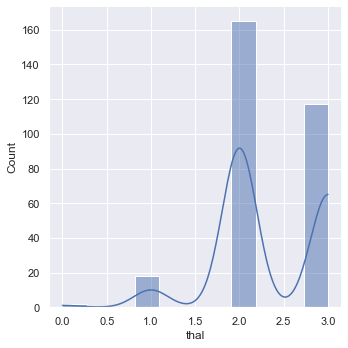

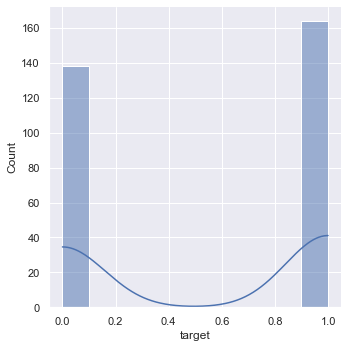

In [19]:
for col in df.columns:
    sns.displot(df[col],kde=True)

<AxesSubplot:xlabel='target', ylabel='count'>

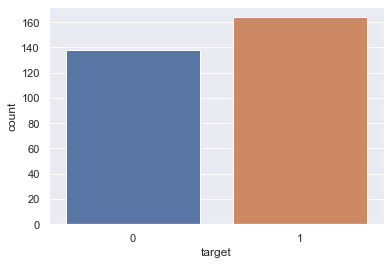

In [20]:
sns.countplot(x='target',data=df)

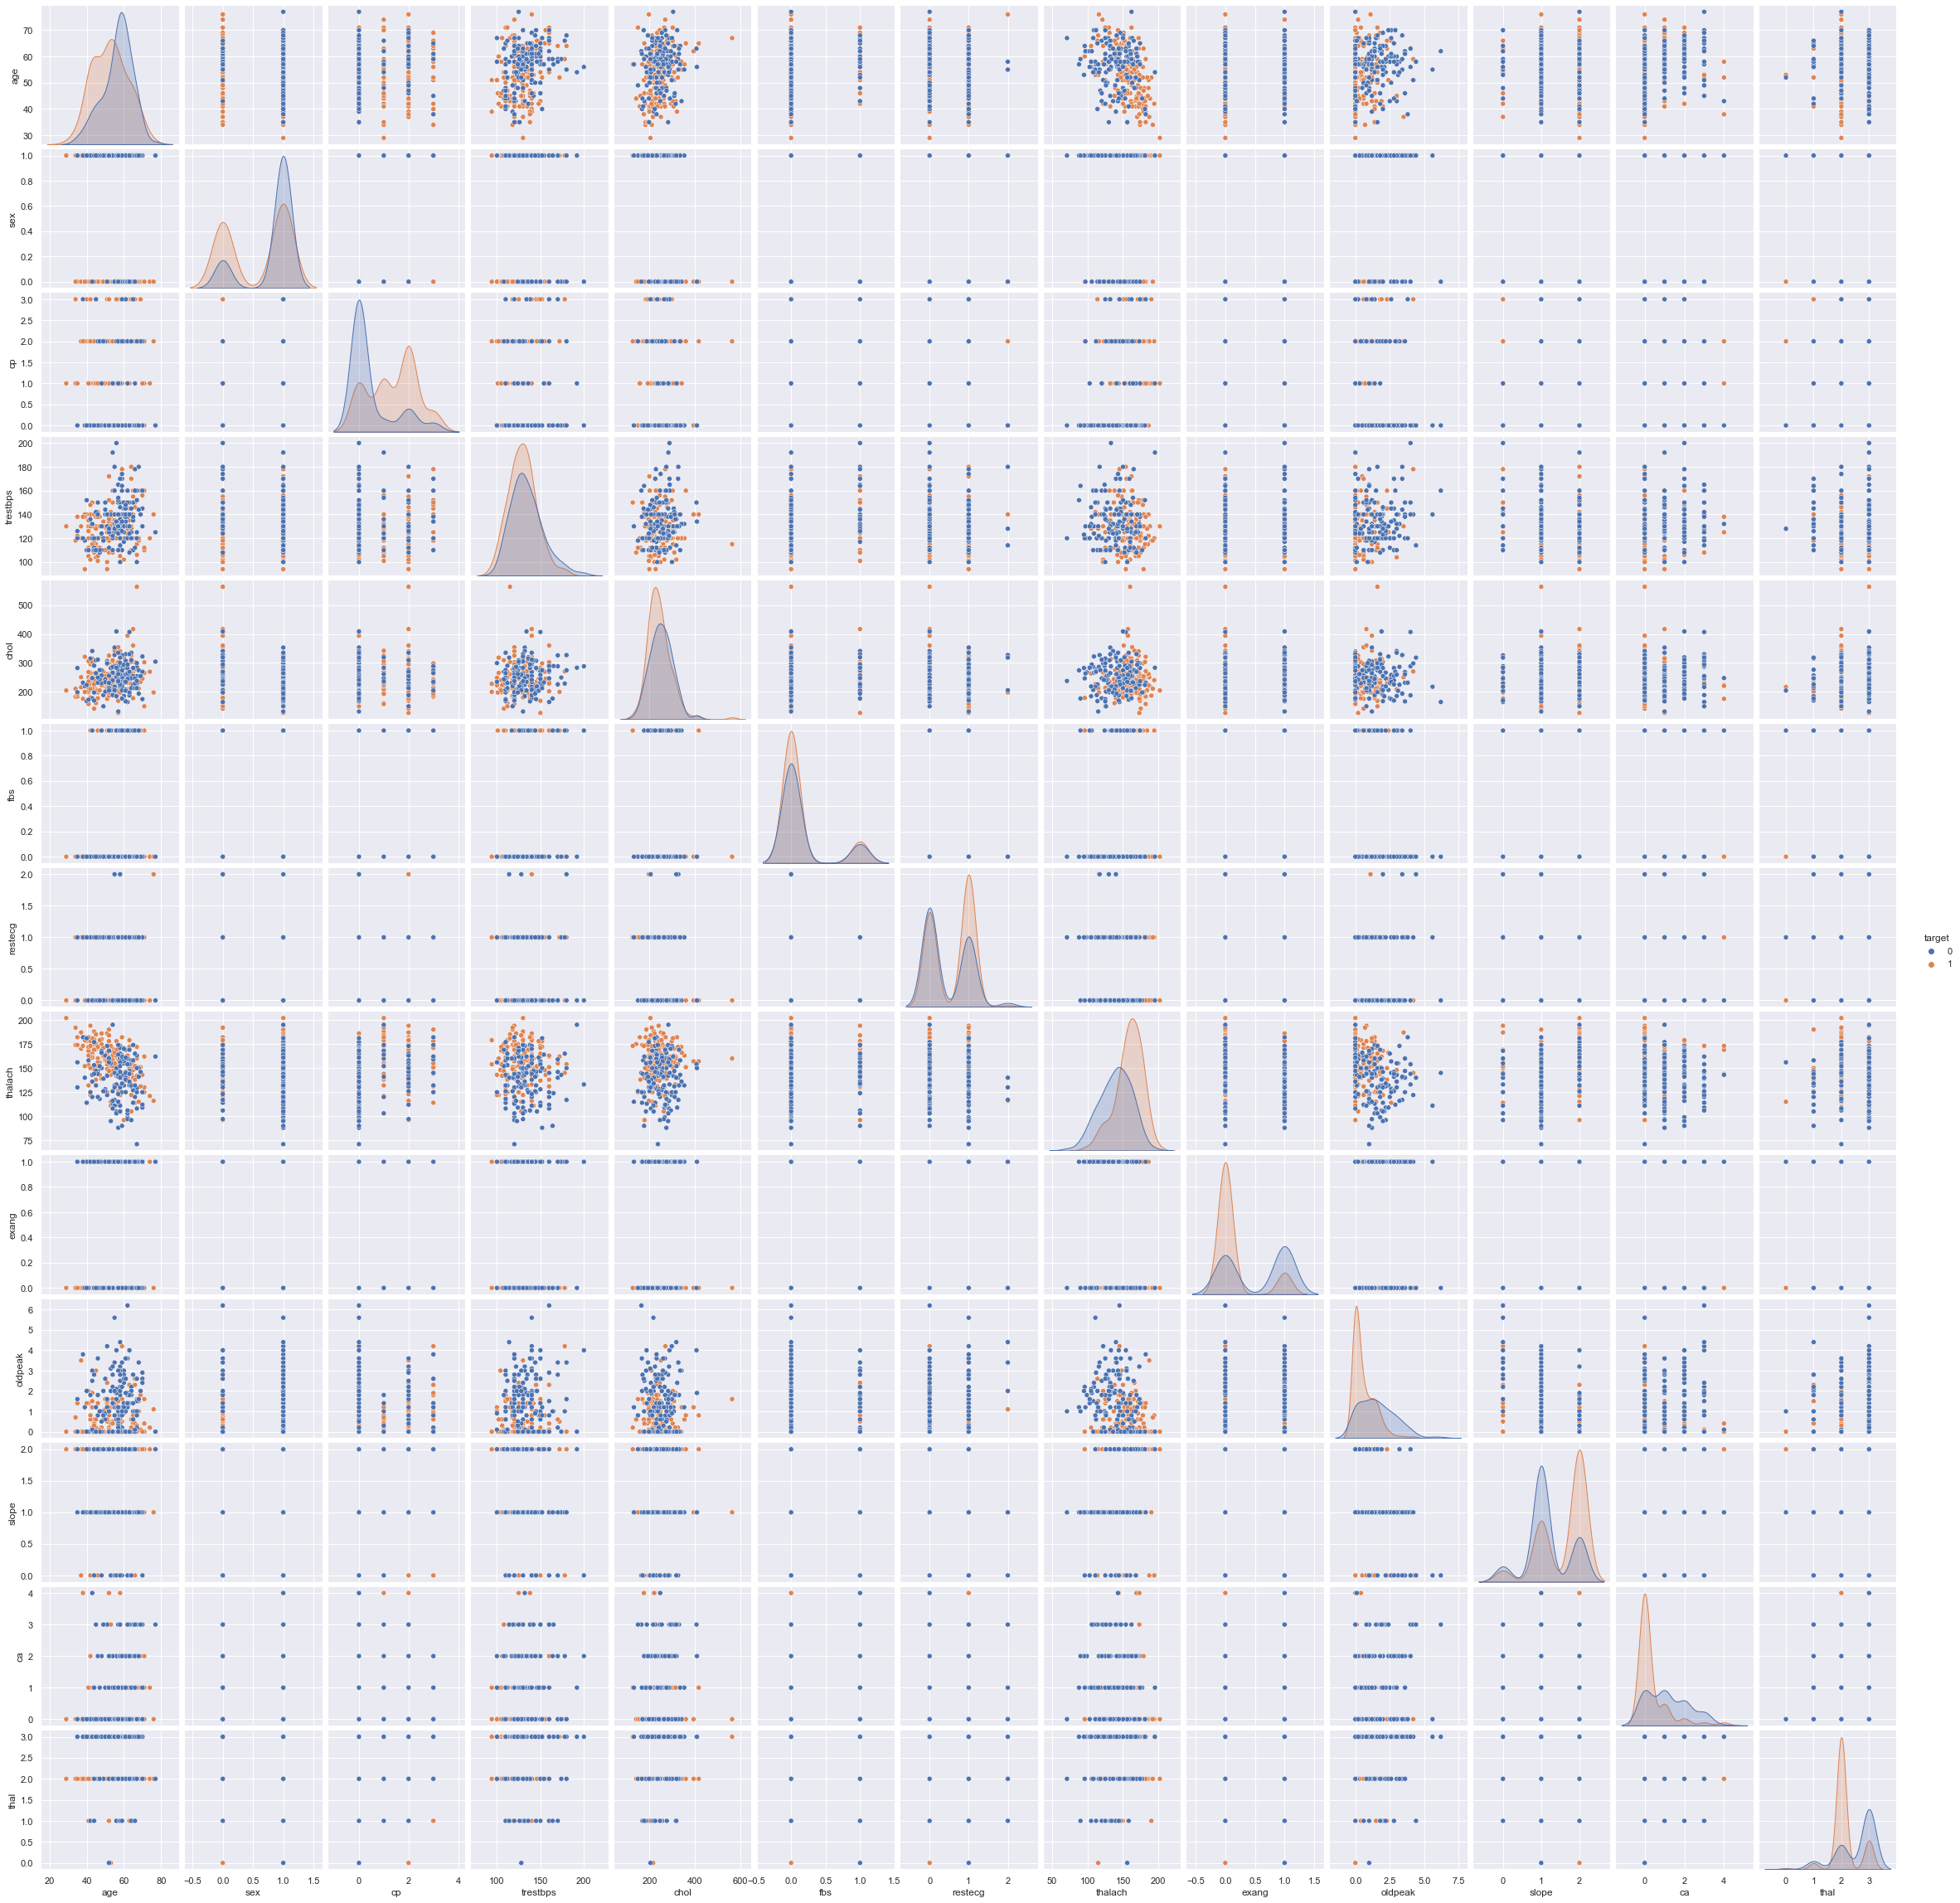

In [21]:
sns.pairplot(hue='target',data=df)

In [22]:
df.iloc[0]

age          63.0
sex           1.0
cp            3.0
trestbps    145.0
chol        233.0
fbs           1.0
restecg       0.0
thalach     150.0
exang         0.0
oldpeak       2.3
slope         0.0
ca            0.0
thal          1.0
target        1.0
Name: 0, dtype: float64

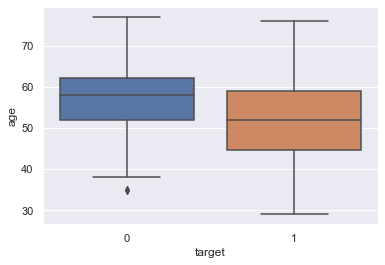

In [23]:
sns.boxplot(x='target',y='age',data=df);

In [24]:
df.iloc[0]

age          63.0
sex           1.0
cp            3.0
trestbps    145.0
chol        233.0
fbs           1.0
restecg       0.0
thalach     150.0
exang         0.0
oldpeak       2.3
slope         0.0
ca            0.0
thal          1.0
target        1.0
Name: 0, dtype: float64

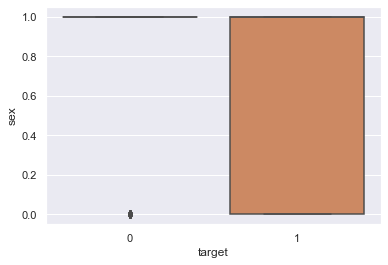

In [25]:
sns.boxplot(x='target',y='sex',data=df);

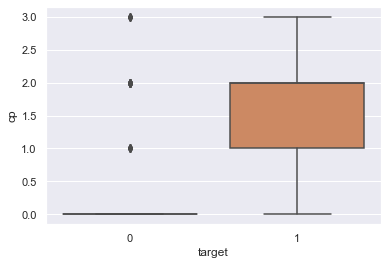

In [26]:
sns.boxplot(x='target',y='cp',data=df);

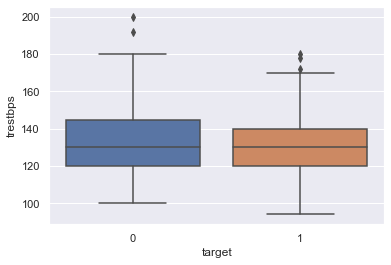

In [27]:
sns.boxplot(x='target',y='trestbps',data=df);

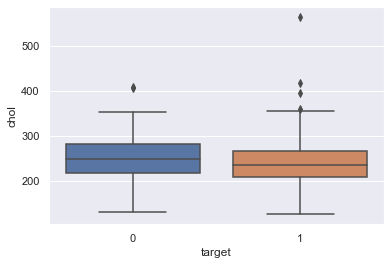

In [28]:
sns.boxplot(x='target',y='chol',data=df);

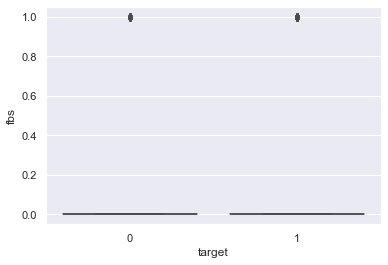

In [29]:
sns.boxplot(x='target',y='fbs',data=df);

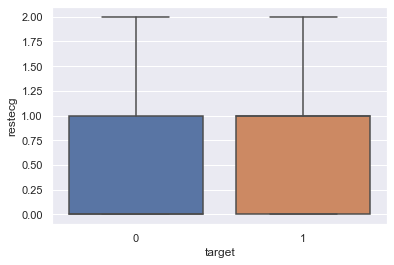

In [30]:
sns.boxplot(x='target',y='restecg',data=df);

<AxesSubplot:xlabel='target', ylabel='slope'>

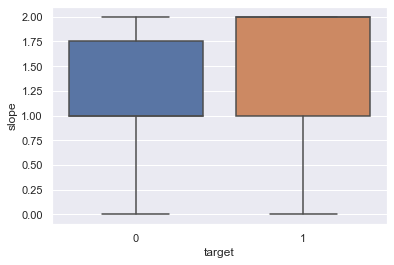

In [31]:
sns.boxplot(x='target',y='slope',data=df)

<AxesSubplot:xlabel='target', ylabel='ca'>

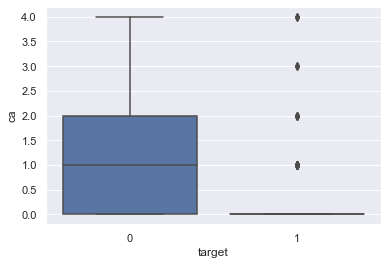

In [32]:
sns.boxplot(x='target',y='ca',data=df)

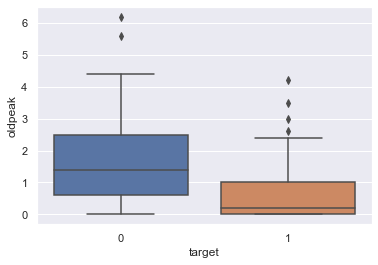

In [33]:
sns.boxplot(x='target',y='oldpeak',data=df);

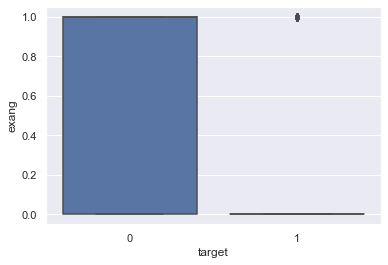

In [34]:
sns.boxplot(x='target',y='exang',data=df);

In [35]:
df.corr()['target']

age        -0.221476
sex        -0.283609
cp          0.432080
trestbps   -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalach     0.419955
exang      -0.435601
oldpeak    -0.429146
slope       0.343940
ca         -0.408992
thal       -0.343101
target      1.000000
Name: target, dtype: float64

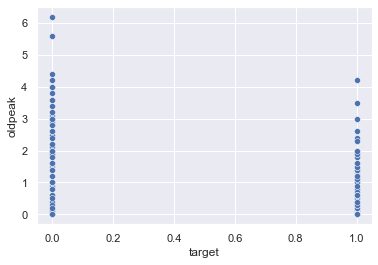

In [36]:
sns.scatterplot(x='target',y='oldpeak',data=df);

In [37]:
# if oldpeak(depression) lies b/w 4.5 to 6 then less chances of HeartFailure

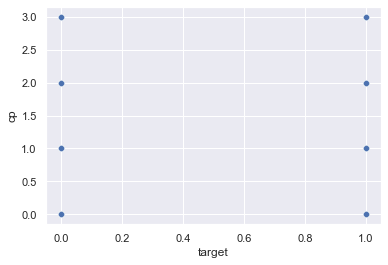

In [38]:
sns.scatterplot(x='target',y='cp',data=df);

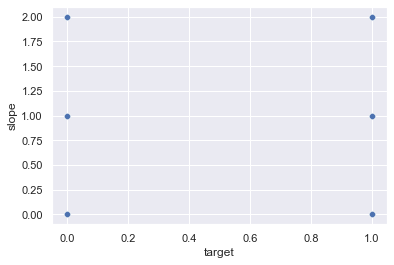

In [39]:
sns.scatterplot(x='target',y='slope',data=df);

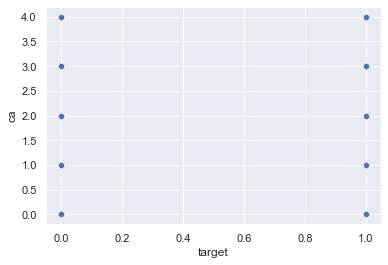

In [40]:
sns.scatterplot(x='target',y='ca',data=df);

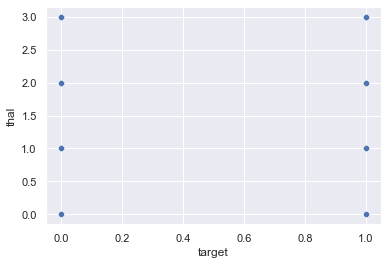

In [41]:
sns.scatterplot(x='target',y='thal',data=df);

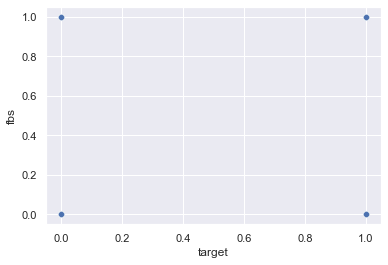

In [42]:
sns.scatterplot(x='target',y='fbs',data=df);

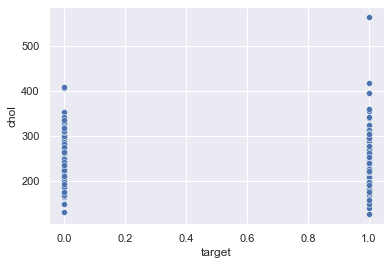

In [43]:
sns.scatterplot(x='target',y='chol',data=df);

In [44]:
#if cholestrol lies b/w 400 and 500 almost then low chances of HeartFailure

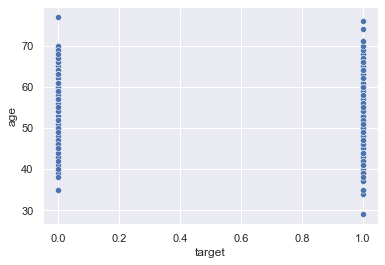

In [45]:
sns.scatterplot(x='target',y='age',data=df);

In [46]:
#if age lies b/w 10 to 40 then there is less chances of HeartDisease

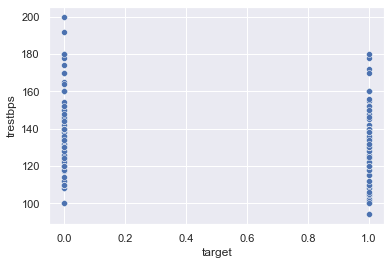

In [47]:
sns.scatterplot(x='target',y='trestbps',data=df);

In [48]:
#if trestbps(resting blood pressure) lies b/w 0 to 100 then there is less chances of Heart Disease

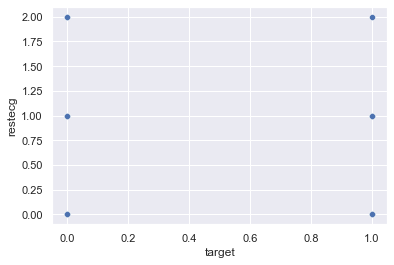

In [49]:
sns.scatterplot(x='target',y='restecg',data=df);

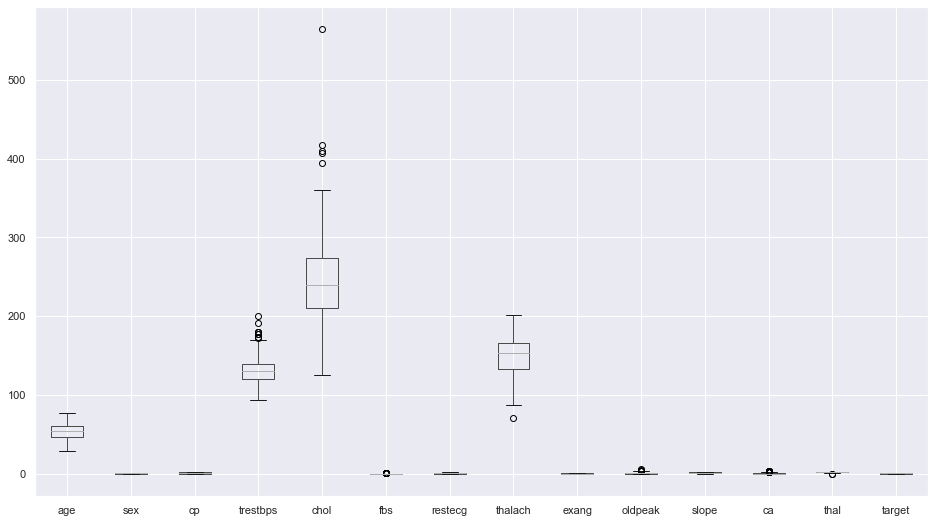

In [47]:
plt.figure(figsize=(16,9))
df.boxplot();

In [26]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot:>

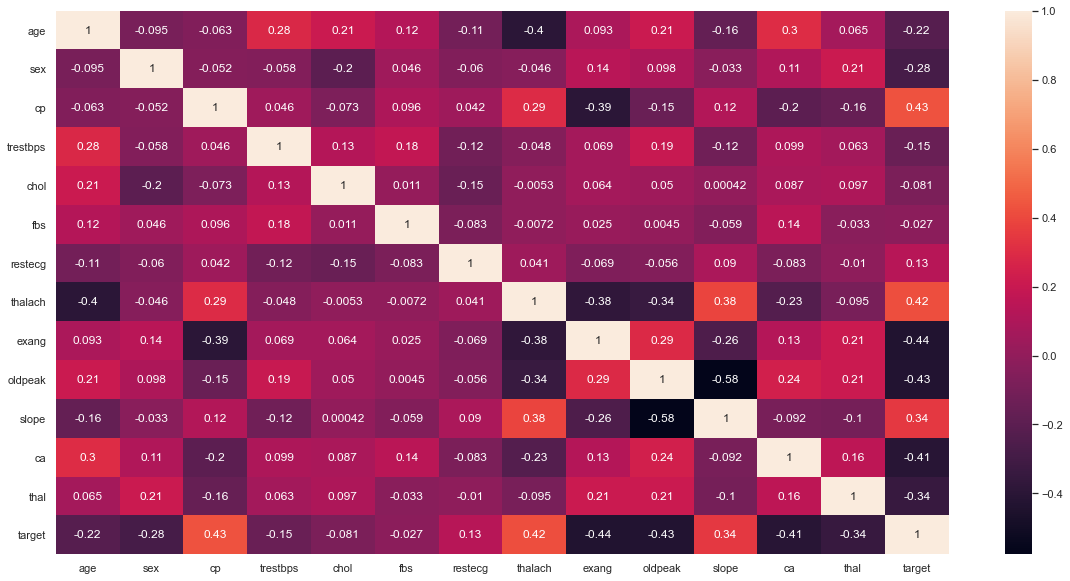

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [28]:
df.loc[0]

age          63.0
sex           1.0
cp            3.0
trestbps    145.0
chol        233.0
fbs           1.0
restecg       0.0
thalach     150.0
exang         0.0
oldpeak       2.3
slope         0.0
ca            0.0
thal          1.0
target        1.0
Name: 0, dtype: float64

In [48]:
df.corr()['target']

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

In [50]:
features = ['chol','thalach']
features

['chol', 'thalach']

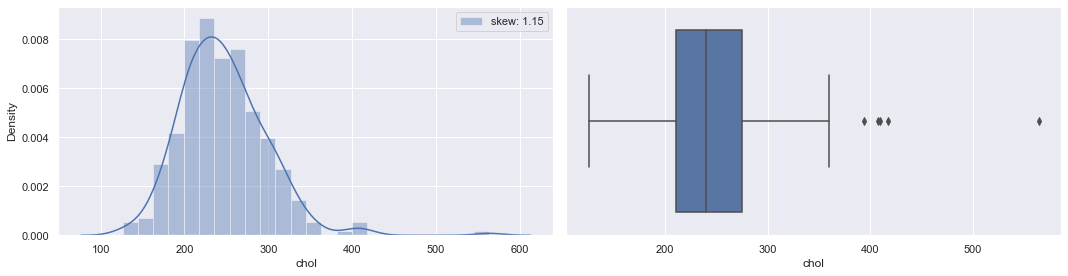

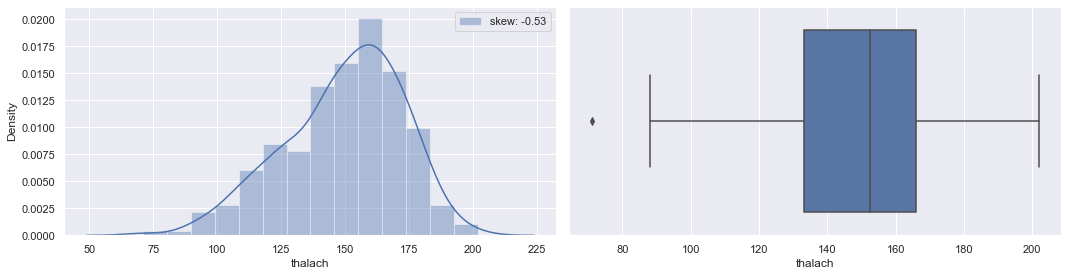

In [51]:
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(122)
    sns.boxplot(df[col])
    plt.tight_layout()
    plt.show()

In [52]:
df_cap=df.copy()

In [53]:
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [54]:
iqr_capping(df_cap, features, 1.5)

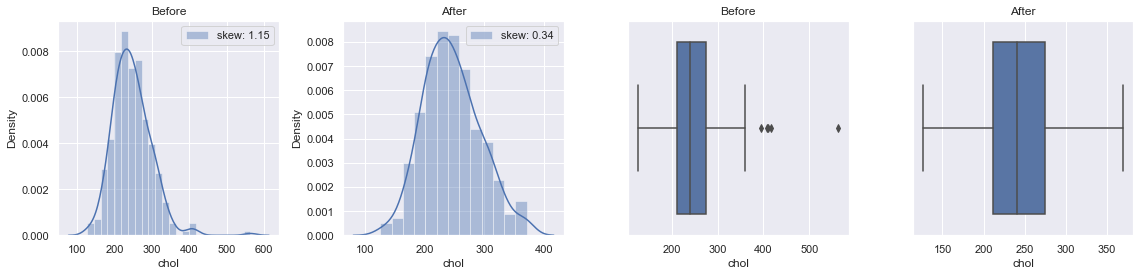

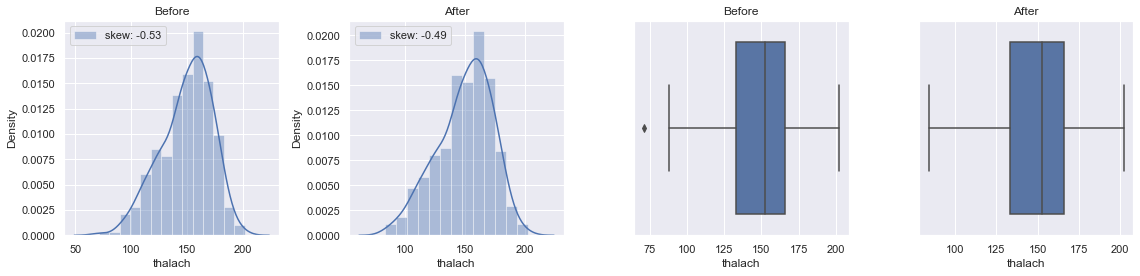

In [55]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [56]:
df_cap.value_counts('target')

target
1    164
0    138
dtype: int64

In [58]:
df_cap.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187.0,0,3.5,0,0,2,1


In [59]:
X=df.drop(columns='target',axis='columns')

In [60]:
y=df['target']

In [61]:
scale=StandardScaler()

In [62]:
X=scale.fit_transform(X)

In [41]:
X

array([[ 0.94979429,  0.68265615,  1.97647049, ..., -2.27118179,
        -0.71491124, -2.1479552 ],
       [-1.92854796,  0.68265615,  1.005911  , ..., -2.27118179,
        -0.71491124, -0.51399432],
       [-1.48572607, -1.46486632,  0.0353515 , ...,  0.97951442,
        -0.71491124, -0.51399432],
       ...,
       [ 1.50332164,  0.68265615, -0.93520799, ..., -0.64583368,
         1.27497996,  1.11996657],
       [ 0.28556146,  0.68265615, -0.93520799, ..., -0.64583368,
         0.28003436,  1.11996657],
       [ 0.28556146, -1.46486632,  0.0353515 , ..., -0.64583368,
         0.28003436, -0.51399432]])

In [63]:
X.shape

(302, 13)

In [64]:
rf=RandomForestClassifier()

In [65]:
rfvs=cross_val_score(rf,X,y,cv=10,n_jobs=-1)

In [66]:
rfvs

array([0.87096774, 0.80645161, 0.83333333, 0.86666667, 0.9       ,
       0.83333333, 0.7       , 0.86666667, 0.73333333, 0.76666667])

In [67]:
rfvs.mean()

0.817741935483871

In [73]:
xgb=XGBClassifier()

In [74]:
xgbv=cross_val_score(xgb,X_train,y_train,cv=10,n_jobs=-1)

In [75]:
xgbv

array([0.8       , 0.91666667, 0.875     , 0.79166667, 0.83333333,
       0.875     , 0.75      , 0.79166667, 0.91666667, 0.66666667])

In [76]:
xgbv.mean()

0.8216666666666667

In [77]:
dtc=DecisionTreeClassifier()

In [78]:
dtcv=cross_val_score(dtc,X_train,y_train,cv=10,n_jobs=-1)

In [79]:
dtcv

array([0.8       , 0.79166667, 0.70833333, 0.75      , 0.79166667,
       0.75      , 0.66666667, 0.79166667, 0.875     , 0.58333333])

In [80]:
dtcv.mean()

0.7508333333333334

In [81]:
lrc=LogisticRegression()

In [82]:
lrcv=cross_val_score(lrc,X_train,y_train,cv=10,n_jobs=-1)

In [83]:
lrcv

array([0.8       , 0.79166667, 0.91666667, 0.91666667, 0.79166667,
       0.83333333, 0.875     , 0.83333333, 0.79166667, 0.75      ])

In [84]:
lrcv.mean()

0.8300000000000001

In [85]:
svc=SVC()

In [86]:
svv=cross_val_score(svc,X_train,y_train,cv=10,n_jobs=-1)

In [87]:
svv

array([0.72      , 0.79166667, 0.91666667, 0.79166667, 0.83333333,
       0.875     , 0.875     , 0.79166667, 0.83333333, 0.75      ])

In [88]:
svv.mean()

0.8178333333333333

In [91]:
# Will select Logistic Regression for model building

In [92]:
params={'penalty':['l1', 'l2'],'C':[0.5,0.4,0.6],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter':[150,180,130]}

In [93]:
lgcr=LogisticRegression()

In [95]:
lrg=GridSearchCV(lgcr,params,cv=10,scoring='accuracy',n_jobs=-1)

In [96]:
lrg.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.5, 0.4, 0.6], 'max_iter': [150, 180, 130],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [97]:
print("\n The best estimator across ALL searched params:\n",lrg.best_estimator_)
print("\n The best score across ALL searched params:\n",lrg.best_score_)
print("\n The best parameters across ALL searched params:\n",lrg.best_params_)


 The best estimator across ALL searched params:
 LogisticRegression(C=0.5, max_iter=150, penalty='l1', solver='liblinear')

 The best score across ALL searched params:
 0.8383333333333333

 The best parameters across ALL searched params:
 {'C': 0.5, 'max_iter': 150, 'penalty': 'l1', 'solver': 'liblinear'}


In [99]:
lrca=LogisticRegression(C= 0.5, max_iter=150, penalty='l1', solver='liblinear')

In [100]:
lrca.fit(X_train,y_train)

LogisticRegression(C=0.5, max_iter=150, penalty='l1', solver='liblinear')

In [101]:
y_train_pred=lrca.predict(X_train)

In [102]:
accuracy_score(y_train,y_train_pred)

0.8589211618257261

In [103]:
y_test_pred=lrca.predict(X_test)

In [104]:
accuracy_score(y_test,y_test_pred)

0.819672131147541

In [105]:
xgba=XGBClassifier()

In [106]:
xgba.fit(X_train,y_train)

[19:41:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [107]:
y_train_pred=xgba.predict(X_train)

In [108]:
accuracy_score(y_train,y_train_pred)

1.0

In [109]:
y_test_pred=xgba.predict(X_test)

In [110]:
accuracy_score(y_test,y_test_pred)

0.8524590163934426

In [111]:
confusion_matrix(y_test,y_test_pred)

array([[26,  3],
       [ 6, 26]], dtype=int64)

In [113]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [114]:
log_loss(y_test,y_test_pred)

5.095924366335848

In [ ]:
#Hyperparatuning